In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, multilabel_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#get the data
from tensorflow.keras.datasets import cifar10

In [4]:
#load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 802s 5us/step


In [5]:
#check the shape of the X_train
X_train.shape

(50000, 32, 32, 3)

#grab the first image
single_image = X_train[0]
single_image

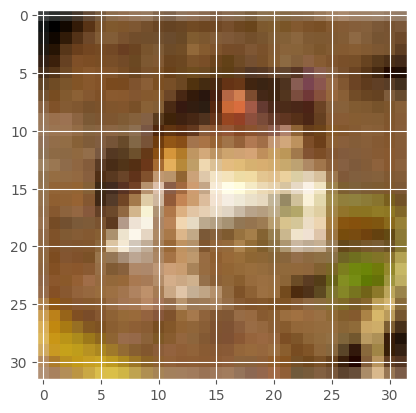

In [7]:
plt.imshow(single_image);

#### Data Preprocessing

* Scaling

In [8]:
X_train = X_train/255

In [9]:
X_test = X_test/255

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
X_test.shape

(10000, 32, 32, 3)

* Convert the target variable to categorical

In [12]:
y_cat_train = to_categorical(y_train)

In [14]:
y_cat_test = to_categorical(y_test)

#### Modeling

In [15]:
model = Sequential()
#create the filtering kernel(convolutional layer)
model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(32,32,3), activation='relu'))
#reduce the parameters using maxpool
model.add(MaxPool2D(pool_size=(2,2)))
#flatten the matrix into 1d array for last output

#create the filtering kernel(convolutional layer)
model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(32,32,3), activation='relu'))
#reduce the parameters using maxpool
model.add(MaxPool2D(pool_size=(2,2)))
#flatten the matrix into 1d array for last output(32*32*3)
model.add(Flatten())
#add in a dense layer
model.add(Dense(256, activation='relu'))
#output layer
model.add(Dense(10, activation='softmax'))
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

#### Training the model

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [18]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4869 - accuracy: 0.4620 - val_loss: 1.3231 - val_accuracy: 0.5249
Epoch 2/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1683 - accuracy: 0.5869 - val_loss: 1.1283 - val_accuracy: 0.6034
Epoch 3/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0239 - accuracy: 0.6410 - val_loss: 1.0438 - val_accuracy: 0.6312
Epoch 4/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9220 - accuracy: 0.6782 - val_loss: 1.0041 - val_accuracy: 0.6535
Epoch 5/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8389 - accuracy: 0.7113 - val_loss: 0.9557 - val_accuracy: 0.6696
Epoch 6/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7579 - accuracy: 0.7376 - val_loss: 0.9610 - val_accuracy: 0.6769
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6931 - accuracy: 0.7589 - val_loss: 0.9604 -

#### Model Evaluation

In [19]:
metrics = pd.DataFrame(model.history.history)

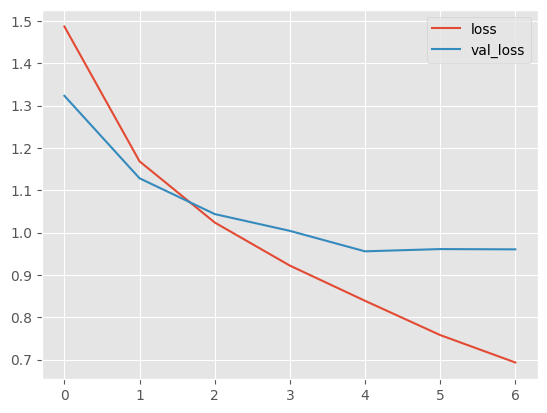

In [20]:
metrics[['loss','val_loss']].plot();

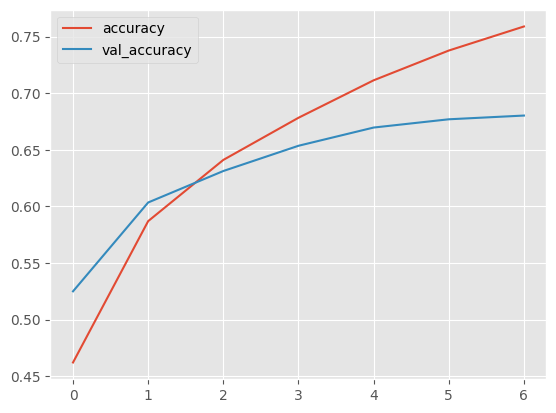

In [21]:
metrics[['accuracy','val_accuracy']].plot();

In [22]:
#check the metrics in the data
model.metrics_names

['loss', 'accuracy']

In [23]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9603559374809265, 0.6801999807357788]

In [24]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

313/313 [==============================] - 3s 8ms/step


In [25]:
print(classification_report(y_cat_test , predictions))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.81      0.77      0.79      1000
           2       0.69      0.46      0.55      1000
           3       0.58      0.40      0.47      1000
           4       0.74      0.49      0.59      1000
           5       0.68      0.47      0.55      1000
           6       0.83      0.70      0.76      1000
           7       0.81      0.66      0.73      1000
           8       0.87      0.67      0.75      1000
           9       0.80      0.72      0.76      1000

   micro avg       0.76      0.61      0.67     10000
   macro avg       0.75      0.61      0.67     10000
weighted avg       0.75      0.61      0.67     10000
 samples avg       0.61      0.61      0.61     10000



In [37]:
#make a prediction
my_number = X_test[16]

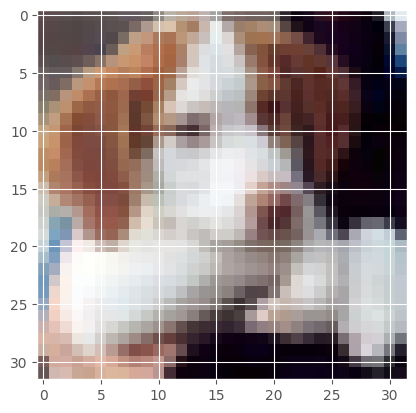

In [38]:
plt.imshow(my_number.reshape(32,32,3));

In [39]:
predicted_index = model.predict(my_number.reshape(1,32,32,3) > 0.5).astype("int32")

1/1 [==============================] - 0s 22ms/step


In [40]:
predicted_number = y_test[predicted_index.flatten()][0]

In [41]:
predicted_number

array([3], dtype=uint8)